# 作业：体验卷积核和滤波，去噪处理

In [1]:
import cv2
import matplotlib.pyplot as plt

# trans to show
def t2s(img):
    return cv2.cvtColor(img, 4)

img = cv2.imread('assets/Chapter-1_homework.png')
img.shape

(1000, 707, 3)

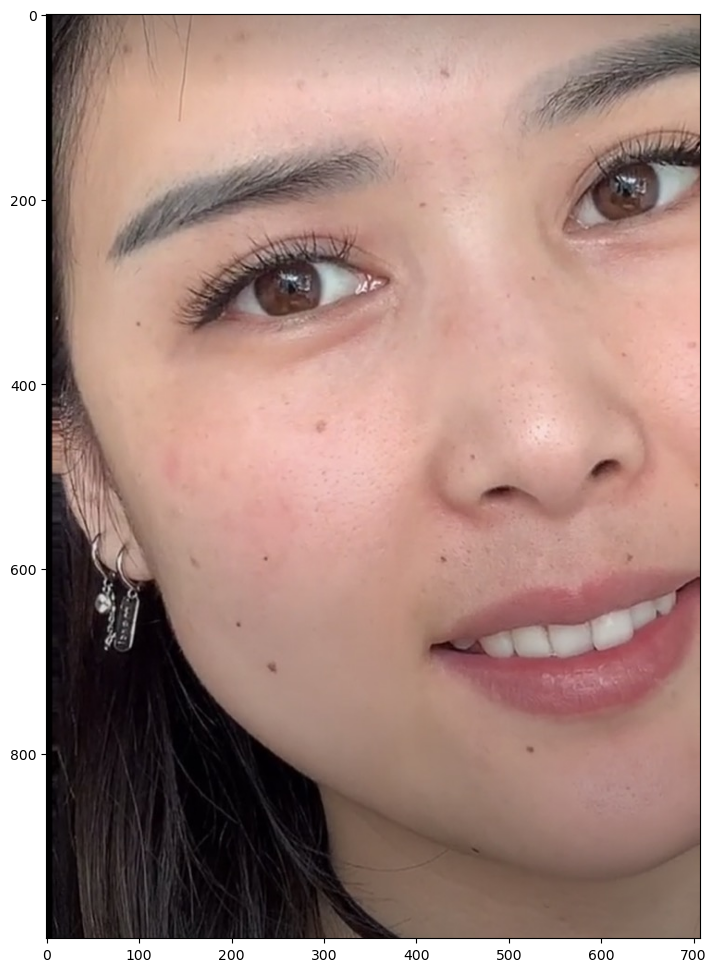

In [2]:
plt.figure(figsize=(12, 12))
plt.imshow(t2s(img))

In [3]:
import numpy as np
# kernel = np.ones((13, 19), np.float32)/(13 * 13)
kernel = np.ones((3, 3), np.float32)
# kernel = kernel/9.
# print(kernel)

# kernel[0,:]=[0.1,0.1,0.1]
# kernel[1,:]=[0.1,0.2,0.1]
# kernel[2,:]=[0.1,0.1,0.1]

kernel[0,:]=[0,-0.5,0]
kernel[1,:]=[-0.5,0,0.5]
kernel[2,:]=[0,0.5,0]
kernel.shape

(3, 3)

(1000, 707, 3)
[12 14 12]


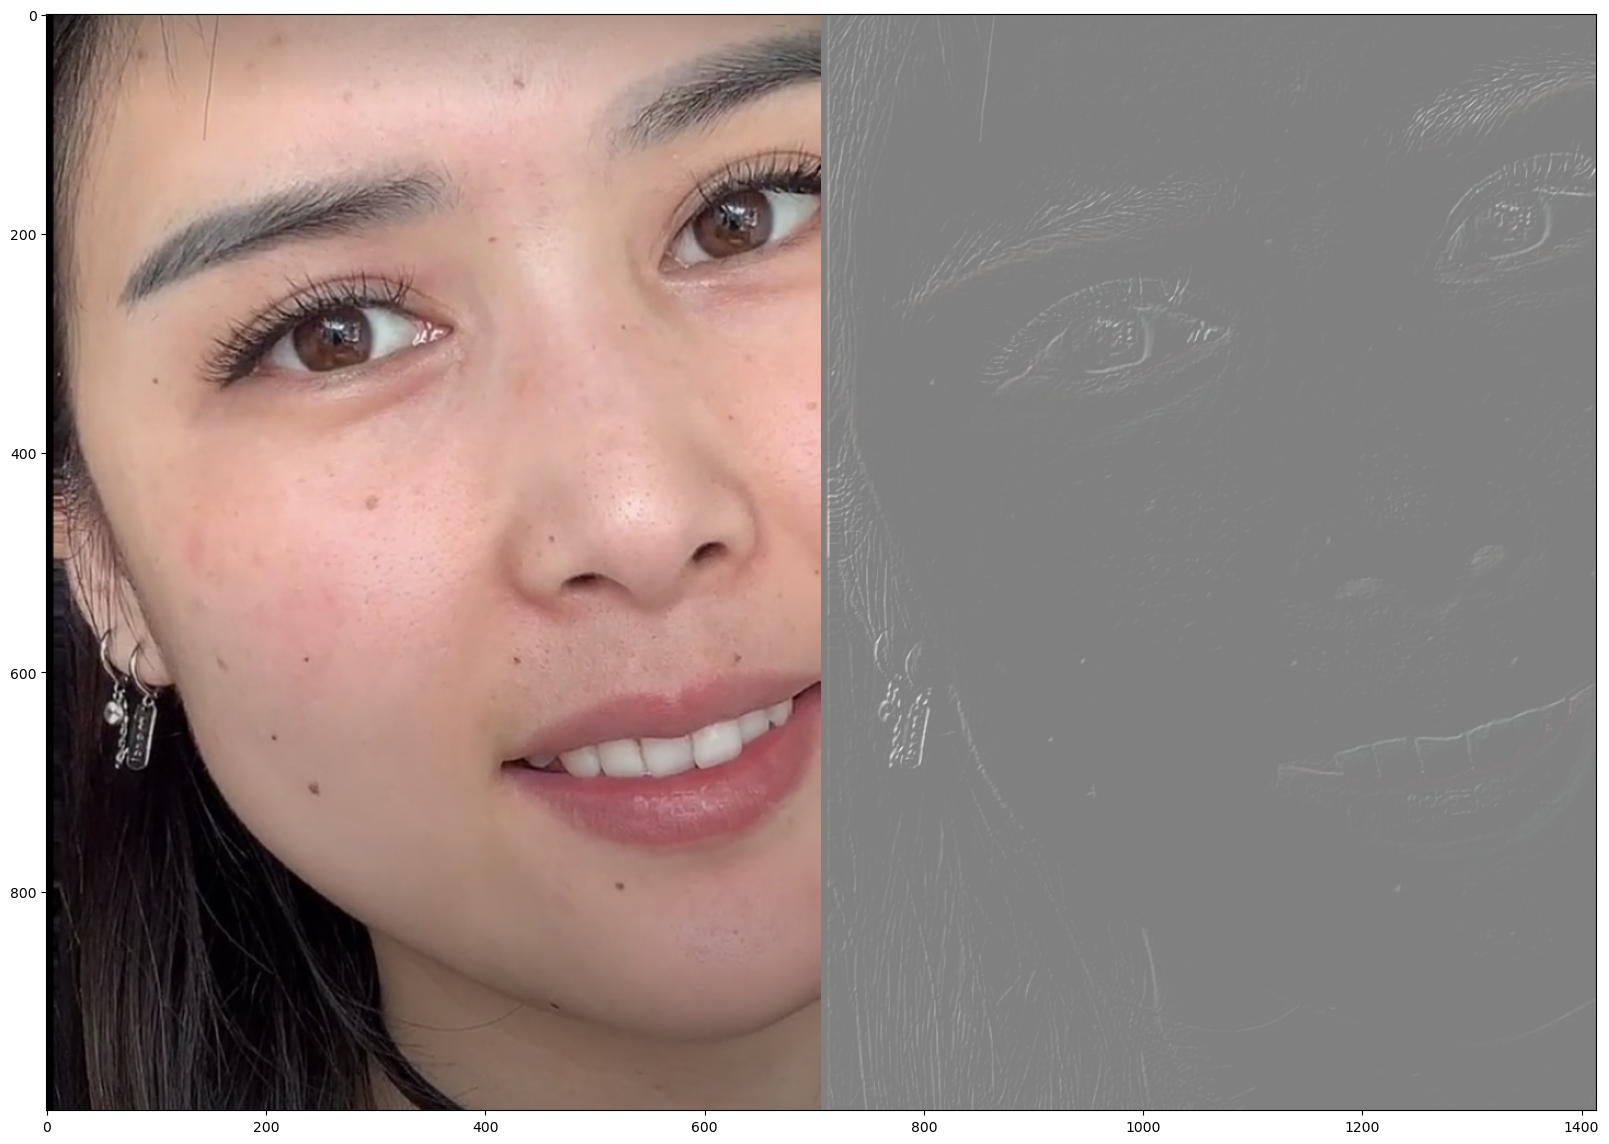

In [5]:
# dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
# 当 ddepth = -1 时，表示输出图像与原图像有相同的深度。
print(img.shape)
result = cv2.filter2D(img, -1, kernel)
result.shape
print(result[300, 300])
plt.figure(figsize=(20, 20))
plt.imshow(t2s(cv2.hconcat([img, result+128])))

### 看不出明显效果，更大滤波核，更多次滤波

In [117]:
kernel_size=17
kernel = np.ones((kernel_size, kernel_size), np.float32)/(kernel_size*kernel_size)
#kernel[i][j]

img1 = cv2.filter2D(img, -1, kernel)
rmg1 = cv2.filter2D(img1, -1, kernel)
filtering = cv2.filter2D(rmg1, -1, kernel)

#### 显示滤波前后对比图

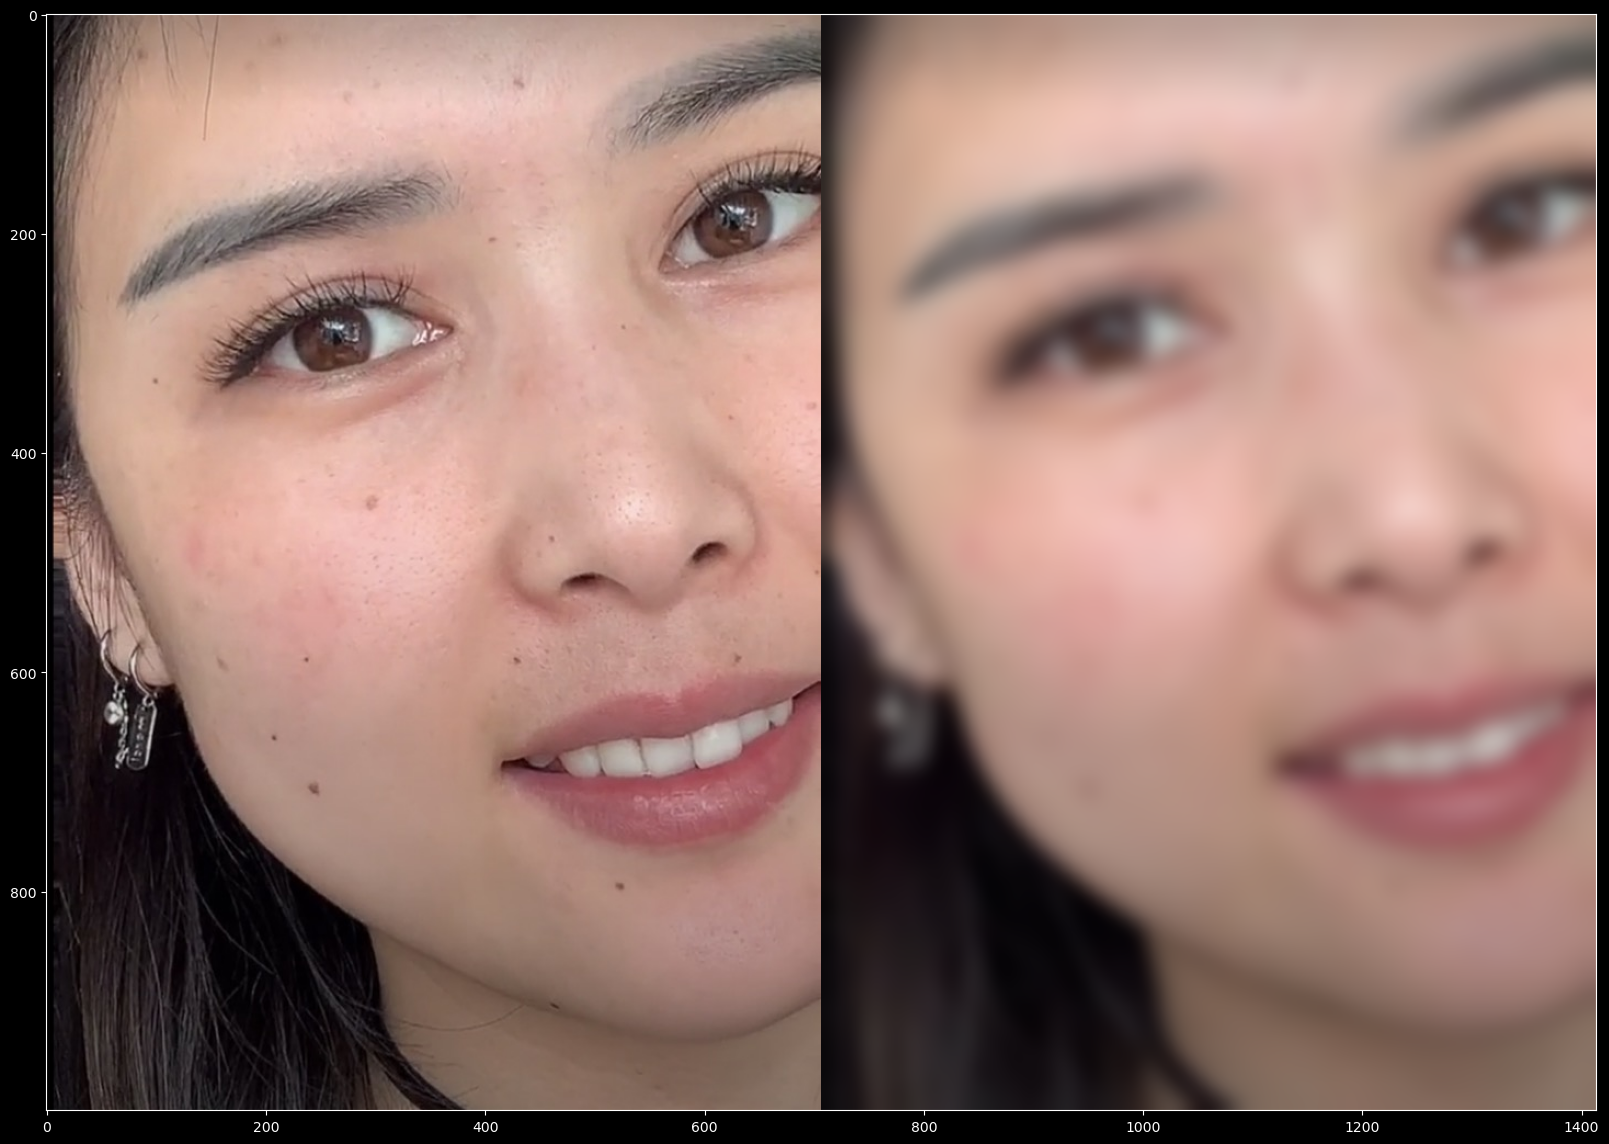

In [137]:
plt.figure(figsize=(20,20))
plt.imshow(t2s(cv2.hconcat([img, filtering])))

#### 只对肤色区域进行滤波

In [214]:
result = filtering.copy()

# 肤色检测
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 把图像转换到HSV色域
(_h, _s, _v) = cv2.split(hsv) # 图像分割, 分别获取h, s, v 通道分量图像
# skin = np.zeros(_h.shape, dtype=np.uint8)  # 根据源图像的大小创建一个全0的矩阵,用于保存图像数据
skin = np.zeros(_h.shape, dtype=np.float32)  # 根据源图像的大小创建一个全0的矩阵,用于保存图像数据

(height,width) = _h.shape # 获取源图像数据的长和宽

# 遍历图像, 判断HSV通道的数值, 如果在指定范围中, 则置把新图像的点设为255,否则设为0
for i in  range(0, height):
    for j in  range(0, width):
        if (_h[i][j] >  5) and (_h[i][j] <  120) and (_s[i][j] >  18) and (_s[i][j] <  255) and (_v[i][j] >  50) and (_v[i][j] <  255):
            skin[i][j] =  1.0
            # dtype:uint8
            #result[i][j]=img[i][j]
        else:
            skin[i][j] =  0.0
            result[i][j] = img[i][j]

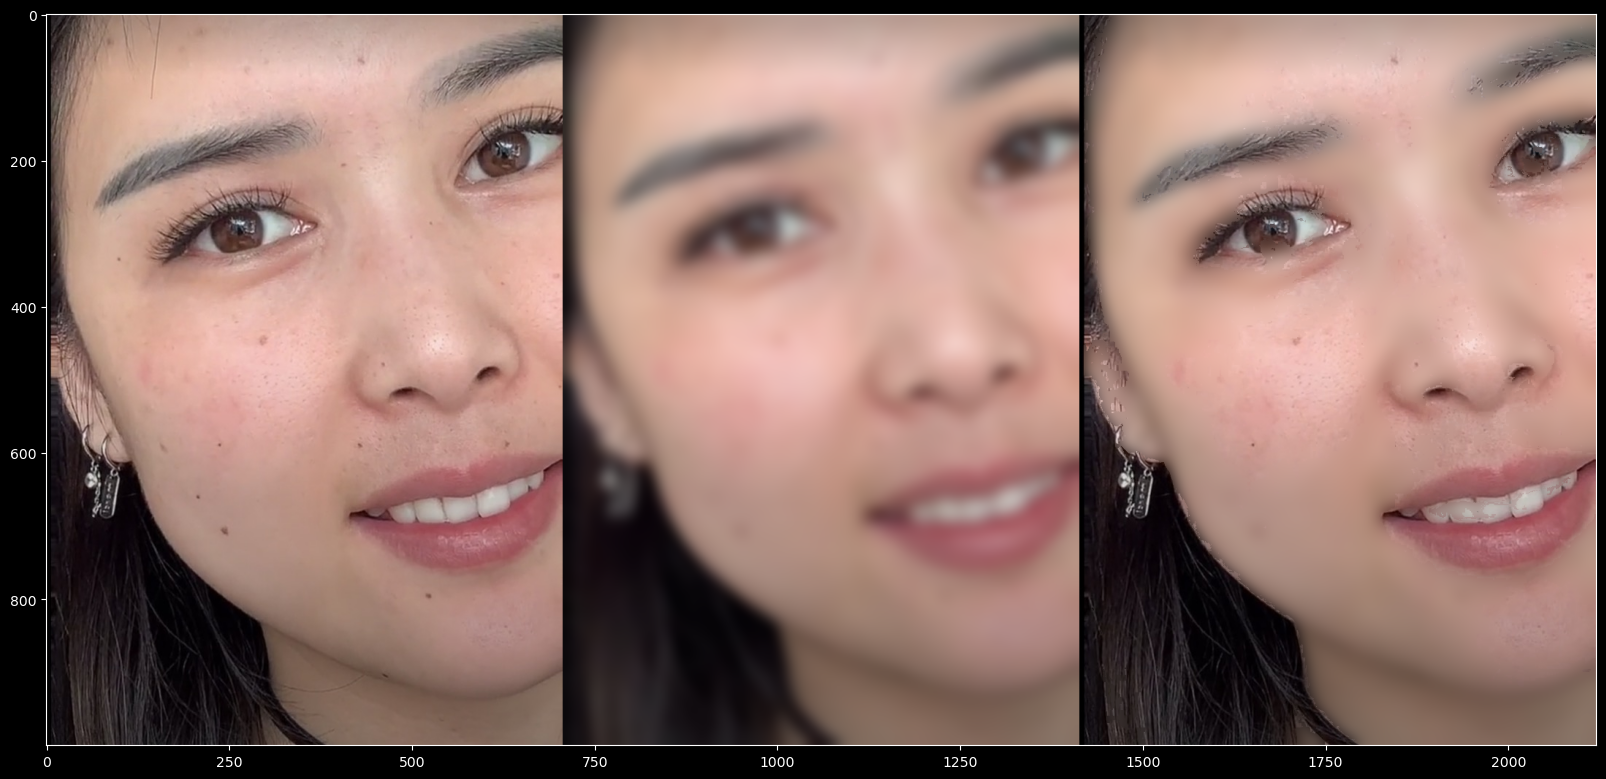

In [215]:
plt.figure(figsize=(20,20))
plt.imshow(t2s(cv2.hconcat([img, filtering, result])))

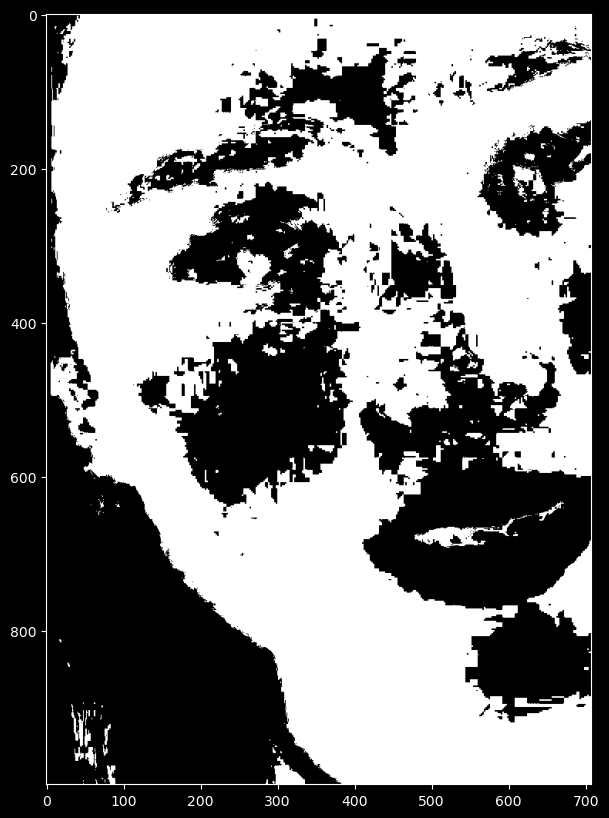

In [216]:
plt.figure(figsize=(10,10))
plt.imshow(t2s(skin))